In this very simple example, we have a network with one input a hidden layer with 2 nodes and an output layer of 1 node. This is a regression problem where we are trying to predict the unknown function.

In [1]:
# Use torch to create tensors to store all of the numerical values, this includes the raw data
import torch
# Used to make the weight and bias tensors part of the neural network
import torch.nn as nn 
# torch.nn.functional gives us the activation functions
import torch.nn.functional as F 
# Stochastic gradient descent
from torch.optim import SGD

import numpy as np 
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
# sns stands for Samual Norman Seaborn a character in the drama "The West Wing"
import seaborn as sns

In [2]:
# Creating a new nearal network class
# nn.module is the basic object module parent class
class BasicNN(nn.Module):
    def __init__(self):
        super().__init__() #inheriting the attribute of the parent class nn.Module 
        self.w00 = nn.Parameter(torch.tensor(1.7), requires_grad=False) # using nn.Parameter gives us the option to optimize it
        self.b00 = nn.Parameter(torch.tensor(-0.85), requires_grad=False) # Manually inputing optimized values 
        self.w01 = nn.Parameter(torch.tensor(-40.8), requires_grad=False)

        self.w10 = nn.Parameter(torch.tensor(12.6), requires_grad=False) 
        self.b10 = nn.Parameter(torch.tensor(0.0), requires_grad=False)
        self.w11 = nn.Parameter(torch.tensor(2.7), requires_grad=False)

        self.final_bias = nn.Parameter(torch.tensor(-16.0), requires_grad=False)# requires tells pytorch when to update parameter

    def forward (self,input):#Create forward propagation function for one input 2 node hidden layer with 1 output
        input_to_relu_1 = input * self.w00 + self.b00
        relu_1_output = F.relu(input_to_relu_1)
        scaled_relu_1_output = relu_1_output * self.w01 

        input_to_relu_2 = input * self.w10 + self.b10
        relu_2_output = F.relu(input_to_relu_2)
        scaled_relu_2_output = relu_2_output * self.w11 

        input_to_final_relu = scaled_relu_1_output + scaled_relu_2_output + self.final_bias

        output = F.relu(input_to_final_relu)

        return(output)

In [3]:
# Create a series of input doses from 0 to 1
input_doses = torch.linspace(start = 0,end=1, steps=11)# Create tensor with 11 values from [0,1]

print(input_doses)

tensor([0.0000, 0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000,
        0.9000, 1.0000])


In [4]:
model = BasicNN()

output_values = model(input_doses)

<AxesSubplot:>

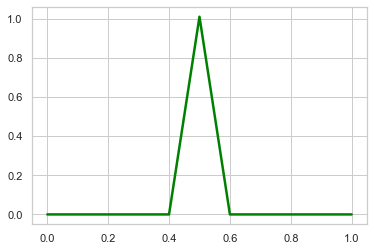

In [5]:
sns.set(style="whitegrid")

sns.lineplot(x = input_doses, y = output_values, color = "green", linewidth = 2.5)

In [6]:
class BasicNN_train(nn.Module):# cloned class used for training
    def __init__(self):
        super().__init__() #inheriting the attribute of the parent class nn.Module 
        self.w00 = nn.Parameter(torch.tensor(1.7), requires_grad=False) # using nn.Parameter gives us the option to optimize it
        self.b00 = nn.Parameter(torch.tensor(-0.85), requires_grad=False) # Manually inputing optimized values 
        self.w01 = nn.Parameter(torch.tensor(-40.8), requires_grad=False)

        self.w10 = nn.Parameter(torch.tensor(12.6), requires_grad=False) 
        self.b10 = nn.Parameter(torch.tensor(0.0), requires_grad=False)
        self.w11 = nn.Parameter(torch.tensor(2.7), requires_grad=False)

        self.final_bias = nn.Parameter(torch.tensor(0.0), requires_grad=True) # "requires_grad = True" is the statement used to tell pytorch to use gradient to optimize

    def forward (self,input):#Create forward propagation function for one input 2 node hidden layer with 1 output
        input_to_relu_1 = input * self.w00 + self.b00
        relu_1_output = F.relu(input_to_relu_1)
        scaled_relu_1_output = relu_1_output * self.w01 

        input_to_relu_2 = input * self.w10 + self.b10
        relu_2_output = F.relu(input_to_relu_2)
        scaled_relu_2_output = relu_2_output * self.w11 

        input_to_final_relu = scaled_relu_1_output + scaled_relu_2_output + self.final_bias

        output = F.relu(input_to_final_relu)

        return(output)

In [7]:
model2 = BasicNN_train()

output_values2 = model2(input_doses)# input is still input doses

Text(0.5, 0, 'Dose')

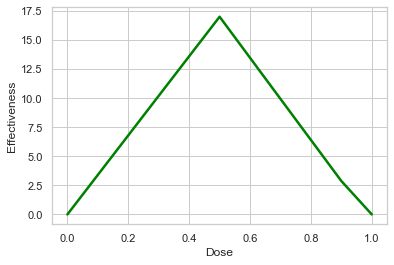

In [8]:
# still graphing with input doses, the .detach method is used to not use the gradient when graphing
sns.lineplot(x = input_doses, y = output_values2.detach(), color = "green", linewidth = 2.5)
plt.ylabel('Effectiveness')
plt.xlabel('Dose')
# because we have not given pytorch any observations to try and optimize towards the finl bias of 0 is used, thus we have a y axis of 17.5

In [9]:
# since we were missing training data with observations let create some.
# creating 2 tensors for x and y

inputs = torch.tensor([0,0.5,1])
labels = torch.tensor([0,1,0])



In [10]:
# create an optimizer.
optimizer = SGD(model2.parameters(), lr=0.1)

# the str function takes the tensor value for final bais and makes it a string.
print("Final bias, before optimization: " + str(model2.final_bias.data) + "\n") 

# training for loop 
for epoch in range(100):

    total_loss = 0
    
    for iteration in range(len(inputs)):
        input_i = inputs[iteration]
        label_i = labels[iteration]

        output_i = model2(input_i) 

        loss = (output_i - label_i)**2 # calculating SSE, in future i'll try MSELoss() or CrossEntropyLoss()

        loss.backward() # Back Propagate

        total_loss += float(loss) 

    if (total_loss < 0.00001):
        print(f'Number of steps: {str(epoch)}')
        break

    optimizer.step()# else, take a small step towards a better value for final_bias
    optimizer.zero_grad()# Zeros out derivatives that are being stored in model. this is important to do for each iteration

    print(f'Step:{str(epoch)}\nFinal Bias: {str(model2.final_bias.data)}')

Final bias, before optimization: tensor(0.)

Step: 0
Final Bias: tensor(-3.2020)
Step: 1
Final Bias: tensor(-5.7636)
Step: 2
Final Bias: tensor(-7.8129)
Step: 3
Final Bias: tensor(-9.4523)
Step: 4
Final Bias: tensor(-10.7638)
Step: 5
Final Bias: tensor(-11.8131)
Step: 6
Final Bias: tensor(-12.6525)
Step: 7
Final Bias: tensor(-13.3240)
Step: 8
Final Bias: tensor(-13.8612)
Step: 9
Final Bias: tensor(-14.2909)
Step: 10
Final Bias: tensor(-14.6348)
Step: 11
Final Bias: tensor(-14.9098)
Step: 12
Final Bias: tensor(-15.1298)
Step: 13
Final Bias: tensor(-15.3059)
Step: 14
Final Bias: tensor(-15.4467)
Step: 15
Final Bias: tensor(-15.5594)
Step: 16
Final Bias: tensor(-15.6495)
Step: 17
Final Bias: tensor(-15.7216)
Step: 18
Final Bias: tensor(-15.7793)
Step: 19
Final Bias: tensor(-15.8254)
Step: 20
Final Bias: tensor(-15.8623)
Step: 21
Final Bias: tensor(-15.8919)
Step: 22
Final Bias: tensor(-15.9155)
Step: 23
Final Bias: tensor(-15.9344)
Step: 24
Final Bias: tensor(-15.9495)
Step: 25
Final Bias